<a href="https://colab.research.google.com/github/marcocenl/MLIndustriaMusical/blob/main/Proyecto_4_Machine_Learning_en_la_Industria_Musical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar librerias

In [326]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


## Subrir datasets, unirlos y limpieza de datos

In [194]:
db_songs = pd.read_csv('/content/drive/MyDrive/prouecto4/songs.csv', encoding='latin-1')
db_songs.head()

,year,songtitle,artistname,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,3,0.853,-4.262,91.525,0.953,11,0.453,0.966656,0.024,0
1,2010,Sticks & Bricks,A Day to Remember,4,1.000,-4.051,140.048,0.921,10,0.469,0.984710,0.025,0
2,2010,All I Want,A Day to Remember,4,1.000,-3.571,160.512,0.489,2,0.209,0.989900,0.026,0
3,2010,It's Complicated,A Day to Remember,4,1.000,-3.815,97.525,0.794,1,0.632,0.939207,0.013,0
4,2010,2nd Sucks,A Day to Remember,4,0.788,-4.707,140.053,0.286,6,0.483,0.987738,0.063,0


In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
db_songs.columns = (
    db_songs.columns
    .str.lower()
    .str.replace(r'\(.*\)', '', regex=True)  # Elimina lo que está entre paréntesis
    .str.replace(r'\n', '', regex=True)      # Elimina los saltos de línea
    .str.replace(':', '', regex=False)       # Elimina los dos puntos
    .str.strip()                             # Elimina espacios en blanco al principio y al final
    .str.replace(r'[/\\]', '_', regex=True)  # Reemplaza diagonales con guiones bajos
    .str.replace(' ', '_', regex=False)      # Reemplaza espacios con guiones bajos
)

db_songs.columns

Index(['year', 'songtitle', 'artistname', 'timesignature',
       'timesignature_confidence', 'loudness', 'tempo', 'tempo_confidence',
       'key', 'key_confidence', 'energy', 'pitch', 'top10'],
      dtype='object')

**Revisamos valores nulos**

In [197]:
db_songs.fillna(0, inplace=True)
db_songs.isna().sum()

year                        0
songtitle                   0
artistname                  0
timesignature               0
timesignature_confidence    0
loudness                    0
tempo                       0
tempo_confidence            0
key                         0
key_confidence              0
energy                      0
pitch                       0
top10                       0
dtype: int64

In [198]:
db_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   timesignature             7574 non-null   int64  
 4   timesignature_confidence  7574 non-null   float64
 5   loudness                  7574 non-null   float64
 6   tempo                     7574 non-null   float64
 7   tempo_confidence          7574 non-null   float64
 8   key                       7574 non-null   int64  
 9   key_confidence            7574 non-null   float64
 10  energy                    7574 non-null   float64
 11  pitch                     7574 non-null   float64
 12  top10                     7574 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 769.4+ KB


In [199]:
db_songs.isnull()

,year,songtitle,artistname,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,top10
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7569,False,False,False,False,False,False,False,False,False,False,False,False,False
7570,False,False,False,False,False,False,False,False,False,False,False,False,False
7571,False,False,False,False,False,False,False,False,False,False,False,False,False
7572,False,False,False,False,False,False,False,False,False,False,False,False,False


In [200]:
db_songs.columns

Index(['year', 'songtitle', 'artistname', 'timesignature',
       'timesignature_confidence', 'loudness', 'tempo', 'tempo_confidence',
       'key', 'key_confidence', 'energy', 'pitch', 'top10'],
      dtype='object')

## Análisis de datos

**Preparación de variables a comparar:**

In [201]:
choosen_variables = ['energy','top10','year','timesignature']

In [202]:
# 'energy'
db_songs['energy'] = db_songs['energy'].replace(r'[^\d.]', '', regex=True).astype(float)

In [203]:
# 'top10'
db_songs['top10'] = db_songs['top10'].replace(r'[^\d.]', '', regex=True).astype(float)

In [204]:
# 'year'
db_songs['year'] = db_songs['year'].replace(r'[^\d.]', '', regex=True).astype(float)

In [205]:
# 'timesignature'
db_songs['timesignature'] = db_songs['timesignature'].replace(r'[^\d.]', '', regex=True).astype(float)

In [206]:
# Queremos convertir cada columna a tipo numérico
for columna in choosen_variables:
    db_songs[columna] = pd.to_numeric(db_songs[columna], errors='coerce')

In [207]:
main_variables = ['energy','top10','timesignature']

In [208]:
for columna in main_variables:
    db_songs[columna] = db_songs[columna].astype(str).str.replace('%', '', regex=False)
    db_songs[columna] = pd.to_numeric(db_songs[columna], errors='coerce')

#### 1. Estimados de locación y variabilidad

**Estimados de Locación**

In [209]:
db_songs[choosen_variables].describe()

,energy,top10,year,timesignature
count,7574.000000,7574.000000,7574.000000,7574.000000
mean,0.675471,0.147742,2001.455902,3.893979
std,0.243473,0.354868,5.815223,0.532561
min,0.000020,0.000000,1990.000000,0.000000
25%,0.500138,0.000000,1997.000000,4.000000
50%,0.718160,0.000000,2002.000000,4.000000
75%,0.887396,0.000000,2006.000000,4.000000
max,0.998492,1.000000,2010.000000,7.000000


In [210]:
# Media o promedio de las variables globales
media_global = db_songs[choosen_variables].mean(numeric_only=True)
media_global

energy              0.675471
top10               0.147742
year             2001.455902
timesignature       3.893979
dtype: float64

In [211]:
# Media o promedio de las variables principales
media_main_variables = db_songs[main_variables].mean(numeric_only=True)
media_main_variables

energy           0.675471
top10            0.147742
timesignature    3.893979
dtype: float64

In [212]:
# Mediana de las variables globales
mediana_global = db_songs[choosen_variables].median()
mediana_global

energy              0.71816
top10               0.00000
year             2002.00000
timesignature       4.00000
dtype: float64

In [213]:
# Mediana de las variables principales
mediana_main_variables = db_songs[main_variables].median()
mediana_main_variables

energy           0.71816
top10            0.00000
timesignature    4.00000
dtype: float64

In [214]:
# Media truncada de energy
stats.trim_mean(db_songs['energy'], 0.1)

0.6970993105070958

In [215]:
# Desviación estándar de las variables globales
std_main_variables = db_songs[choosen_variables].std()
std_main_variables

energy           0.243473
top10            0.354868
year             5.815223
timesignature    0.532561
dtype: float64

In [216]:
# Desviación estándar de las variables principales
std_main_variables = db_songs[main_variables].std()
std_main_variables

energy           0.243473
top10            0.354868
timesignature    0.532561
dtype: float64

**Estadísticos de orden**

In [217]:
quartiles_main = {
    variable: [
        db_songs[variable].min(),
        db_songs[variable].quantile(0.25),
        db_songs[variable].quantile(0.50),
        db_songs[variable].quantile(0.75),
        db_songs[variable].max()
    ]
    for variable in main_variables
}
for variable, quartile_values in quartiles_main.items():
    print(f"Estadísticas para '{variable}':")
    print(f"Valor mínimo: {quartile_values[3]}")
    print(f"Percentil 25: {quartile_values[0]}")
    print(f"Percentil 50: {quartile_values[1]}")
    print(f"Percentil 75: {quartile_values[2]}")
    print(f"Valor máximo: {quartile_values[4]}")


Estadísticas para 'energy':
Valor mínimo: 0.8873964692499999
Percentil 25: 2e-05
Percentil 50: 0.50013809725
Percentil 75: 0.7181596125
Valor máximo: 0.998492393
Estadísticas para 'top10':
Valor mínimo: 0.0
Percentil 25: 0.0
Percentil 50: 0.0
Percentil 75: 0.0
Valor máximo: 1.0
Estadísticas para 'timesignature':
Valor mínimo: 4.0
Percentil 25: 0.0
Percentil 50: 4.0
Percentil 75: 4.0
Valor máximo: 7.0


In [218]:
# Rango para las variables principales
differences = {variable: db_songs[variable].max() - db_songs[variable].min() for variable in main_variables}

for variable, difference in differences.items():
    print(f"Diferencia en '{variable}': {difference}")

Diferencia en 'energy': 0.998472393
Diferencia en 'top10': 1.0
Diferencia en 'timesignature': 7.0


**Rango intercuartílico**

In [219]:
interquartile_ranges = db_songs[main_variables].quantile(0.75) - db_songs[main_variables].quantile(0.25)
interquartile_ranges

energy           0.387258
top10            0.000000
timesignature    0.000000
dtype: float64

#### 2. Distribuciones de datos

<Figure size 600x400 with 0 Axes>

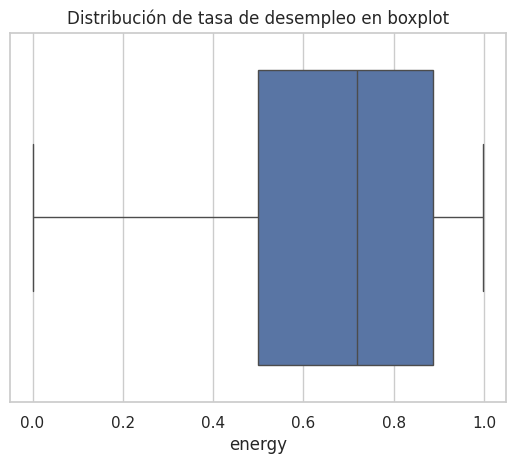

<Figure size 600x400 with 0 Axes>

In [220]:
# Boxplots
sns.set(style="whitegrid")
sns.boxplot(x=db_songs['energy'])
plt.xlabel('energy')
plt.title('Distribución de energy en boxplot')
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

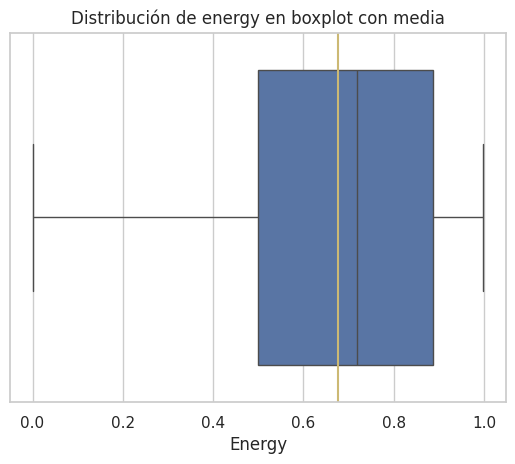

<Figure size 600x400 with 0 Axes>

In [221]:
# Boxplot con media
sns.set(style="whitegrid")
sns.boxplot(x=db_songs['energy'])
plt.axvline(db_songs['energy'].mean(), c='y')
plt.xlabel('Energy')
plt.title('Distribución de energy en boxplot con media')
plt.figure(figsize=(6, 4))

In [222]:
# Boxplot con IQR score
iqr = db_songs['energy'].quantile(0.75) - db_songs['energy'].quantile(0.25)
filtro_inferior = db_songs['energy'] > db_songs['energy'].quantile(0.25) - (iqr * 1.5)
filtro_superior = db_songs['energy'] < db_songs['energy'].quantile(0.75) + (iqr * 1.5)
df_filtrado = db_songs[filtro_inferior & filtro_superior]

<Figure size 600x400 with 0 Axes>

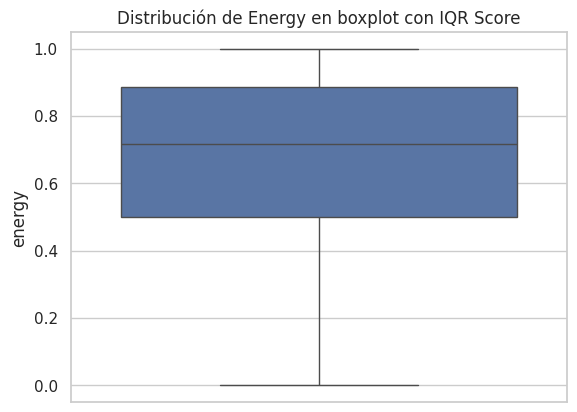

<Figure size 600x400 with 0 Axes>

In [223]:
sns.boxplot(df_filtrado['energy'])
plt.title('Distribución de Energy en boxplot con IQR Score')
plt.figure(figsize=(6, 4))

**Tabla de frecuencias**

Para determinar el número de segmentos optamos por utilizar la regla de Scott.

In [224]:
# Tabla de frecuencias
energy_range = db_songs['energy']
num_bins_desired = 5
data_range = energy_range.max() - energy_range.min()
interval_width = data_range / num_bins_desired
bins = [energy_range.min() + i * interval_width for i in range(num_bins_desired + 1)]
num_bins = pd.cut(energy_range, bins=bins).value_counts().shape[0]
num_bins

5

Tomando en cuenta el resultado, vamos a decidir dividir nuestro conjunto en 5 segmentos.

In [225]:
energy_rate = db_songs['energy']
segmentos = pd.cut(energy_rate, 5)

In [226]:
db_songs['energy'].groupby(segmentos).count()

energy
(-0.000978, 0.2]     334
(0.2, 0.399]         866
(0.399, 0.599]      1470
(0.599, 0.799]      1895
(0.799, 0.998]      3009
Name: energy, dtype: int64

In [227]:
#insertamos en la base de datos una columna con el segmento que corresponde a cada canción
db_songs['segment'] = pd.cut(db_songs['energy'], bins=num_bins, labels=[f"segment_{i}" for i in range(1, num_bins + 1)])

In [228]:
canciones_segmento_1 = db_songs[db_songs['segment'] == 'segment_1']['songtitle']
canciones_segmento_1

66                       After the Earthquake
68      In Gratitude for This Magnificent Day
69                                The Morning
138                               Danger Bear
269                        Kaleidoscope Heart
                        ...                  
7387                   I Love You Little Girl
7389                                   Museum
7395                                      Woe
7508                          Grapes of Wrath
7553                         Over Rusty Water
Name: songtitle, Length: 334, dtype: object

In [229]:
canciones_segmento_2 = db_songs[db_songs['segment'] == 'segment_2']['songtitle']
canciones_segmento_2

12                           I Am a Ghost (Artifact)
13             An Onest Thank You (Credits & Genres)
32      Don't You Think Someone Should Take You Home
38                                Be Good Until Then
39                                        Sexy Chick
                            ...                     
7531                                        Jerk Out
7539                                   It's My Party
7540                                    Johnny Angel
7542                                       Sleepwalk
7558                                 Pulsing Pulsing
Name: songtitle, Length: 866, dtype: object

In [230]:
canciones_segmento_3 = db_songs[db_songs['segment'] == 'segment_3']['songtitle']
canciones_segmento_3

9                       Whataya Want From Me
16            A Real Clever Trick Fur a Bear
21                    The New School Shooter
28                              Canadian Ten
40                                     Xibir
                        ...                 
7544                              Release Me
7548    The World is Full of Angry Young Men
7552                  Looking for Footprints
7555                       Another Satellite
7561                          Take This Town
Name: songtitle, Length: 1470, dtype: object

In [231]:
canciones_segmento_4 = db_songs[db_songs['segment'] == 'segment_4']['songtitle']
canciones_segmento_4

11                          Phillip Garrido
14         Brain ___ Heart (I Need to Know)
15       A Particularly Long Elevator Shaft
17                You've Been Had (Machine)
19      In the Style of a Tight Rope Walker
                       ...                 
7559                         Happy Families
7560                      Blame the Weather
7564            Don't Be Afraid Of The Dark
7567                  Come In From The Rain
7571                             Ten Lovers
Name: songtitle, Length: 1895, dtype: object

In [232]:
canciones_segmento_5 = db_songs[db_songs['segment'] == 'segment_5']['songtitle']
canciones_segmento_5

0       This Is the House That Doubt Built
1                          Sticks & Bricks
2                               All I Want
3                         It's Complicated
4                                2nd Sucks
                       ...                
7568                       Red Hot & Ready
7569                            She's Gone
7570                            Let It Out
7572                Goin' Off The Deep End
7573                             Surrender
Name: songtitle, Length: 3009, dtype: object

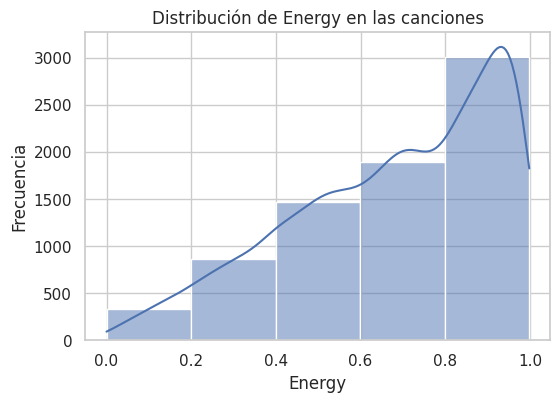

In [233]:
# Histogramas
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(db_songs['energy'], bins=5, kde=True)
plt.xlabel('Energy')
plt.ylabel('Frecuencia')
plt.title('Distribución de Energy en las canciones')
plt.show()

In [234]:
# Describiendo histogramas

En nuestro gráfico podemos observar una Asimetría Positiva (right-skewed en la energía de las canciones porque el gráfico tiene colas más largas hacia el lado derecho del punto central.

In [235]:
asimetria_unemployment = stats.skew(db_songs['energy'])
asimetria_unemployment

-0.617365292371578

In [236]:
curtosis_unemployment = stats.kurtosis(db_songs['energy'])
curtosis_unemployment

-0.5631047020454285

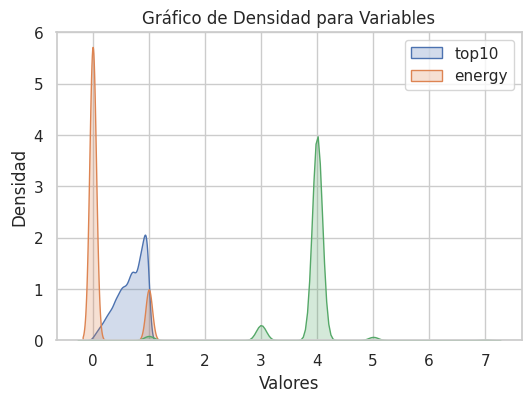

In [237]:
# Gráficas de densidad
plt.figure(figsize=(6, 4))
for variable in main_variables:
    sns.kdeplot(db_songs[variable], label=variable, fill=True)
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad para Variables')
plt.legend(labels=['top10', 'energy'])
plt.show()

#### 3. Exploración de Variables Categóricas y Análisis Multivariable

**Gráfica de barras**

In [238]:
segments = sorted(db_songs['segment'].unique())
segments

['segment_1', 'segment_2', 'segment_3', 'segment_4', 'segment_5']

In [239]:
segment_count = db_songs['segment'].value_counts()
segment_count

segment_5    3009
segment_4    1895
segment_3    1470
segment_2     866
segment_1     334
Name: segment, dtype: int64

In [240]:
colores = ['#FFB6C1', '#87CEEB', '#98FB98', '#FFA07A', '#FFC0CB', '#B0E0E6', '#FF6347','#FFD700']

Text(0.5, 1.0, 'Canciones por segmento de Energía')

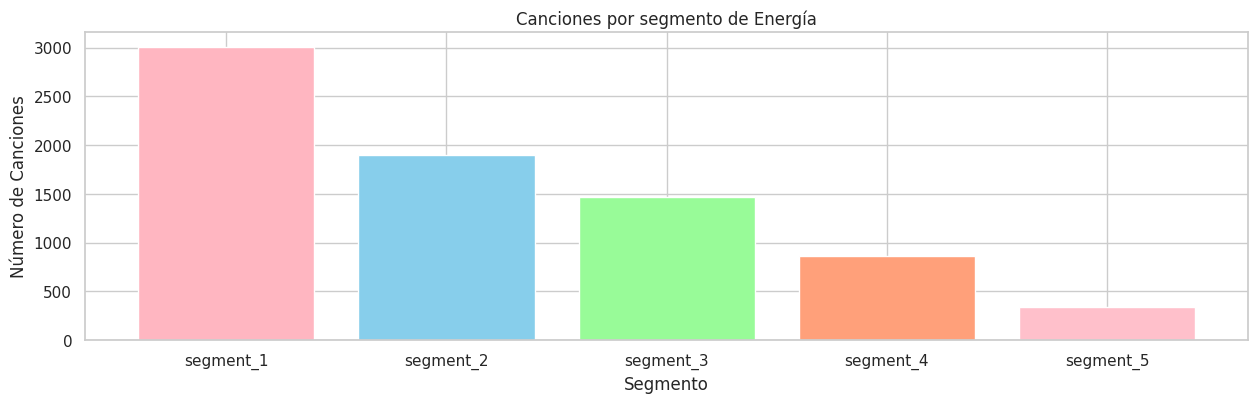

In [241]:
plt.figure(figsize=(15, 4))
plt.bar(segments, segment_count, color=colores)
plt.xticks(segments)
plt.xlabel('Segmento')
plt.ylabel('Número de Canciones')
plt.title('Canciones por segmento de Energía')


**Moda**

In [242]:
db_songs['segment'].mode()

0    segment_5
Name: segment, dtype: category
Categories (5, object): ['segment_1' < 'segment_2' < 'segment_3' < 'segment_4' < 'segment_5']

**Tablas de contingencia**

In [243]:
db_songs.head()

,year,songtitle,artistname,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,top10,segment
0,2010.0,This Is the House That Doubt Built,A Day to Remember,3.0,0.853,-4.262,91.525,0.953,11,0.453,0.966656,0.024,0.0,segment_5
1,2010.0,Sticks & Bricks,A Day to Remember,4.0,1.000,-4.051,140.048,0.921,10,0.469,0.984710,0.025,0.0,segment_5
2,2010.0,All I Want,A Day to Remember,4.0,1.000,-3.571,160.512,0.489,2,0.209,0.989900,0.026,0.0,segment_5
3,2010.0,It's Complicated,A Day to Remember,4.0,1.000,-3.815,97.525,0.794,1,0.632,0.939207,0.013,0.0,segment_5
4,2010.0,2nd Sucks,A Day to Remember,4.0,0.788,-4.707,140.053,0.286,6,0.483,0.987738,0.063,0.0,segment_5


In [244]:
timesignature_rate = db_songs['timesignature']
timesignature_rate = pd.cut(timesignature_rate, 5)
db_songs['timesignature'].groupby(timesignature_rate).count()

timesignature
(-0.007, 1.4]     153
(1.4, 2.8]          0
(2.8, 4.2]       7290
(4.2, 5.6]        112
(5.6, 7.0]         19
Name: timesignature, dtype: int64

In [245]:
db_songs['timesignature_rate'] = pd.cut(db_songs['timesignature'], bins=5, labels=[f"segment_{i}" for i in range(1, 5 + 1)])

In [246]:
db_songs['top10']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7569    0.0
7570    0.0
7571    0.0
7572    0.0
7573    0.0
Name: top10, Length: 7574, dtype: float64

In [247]:
def assign_language(row):
    if row['top10'] == '1':
        return 'Y'
    else:
        return 'N'
db_songs['hit_song'] = db_songs.apply(assign_language, axis=1)

In [248]:
crosstab = pd.crosstab(db_songs['segment'], [db_songs['hit_song'],db_songs['timesignature_rate']], margins=True, margins_name='total')
crosstab

hit_song                   N                               total
timesignature_rate segment_1 segment_3 segment_4 segment_5      
segment                                                         
segment_1                 21       302        10         1   334
segment_2                 32       808        21         5   866
segment_3                 21      1422        23         4  1470
segment_4                 17      1853        23         2  1895
segment_5                 62      2905        35         7  3009
total                    153      7290       112        19  7574

#### 4. Correlaciones y Regresión Linear Simple

Correlación con energy: -0.11699201482481181


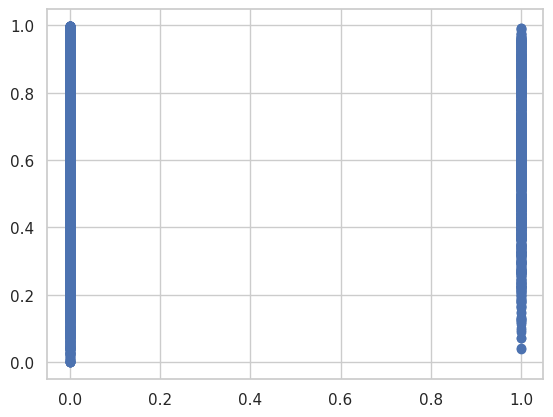

In [313]:
plt.scatter(db_songs[main_variables[1]], db_songs[choosen_variables[0]])
print(f'Correlación con {choosen_variables[0]}: {db_songs[main_variables[1]].corr(db_songs[choosen_variables[0]])}')

Correlación con top10: 0.9999999999999999


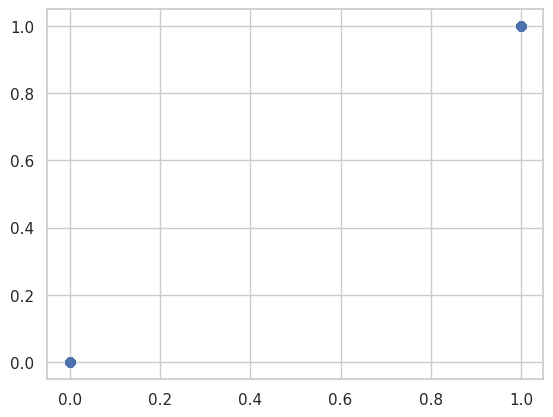

In [314]:
plt.scatter(db_songs[main_variables[1]], db_songs[choosen_variables[1]])
print(f'Correlación con {choosen_variables[1]}: {db_songs[main_variables[1]].corr(db_songs[choosen_variables[1]])}')

Correlación con year: -0.0959280020199362


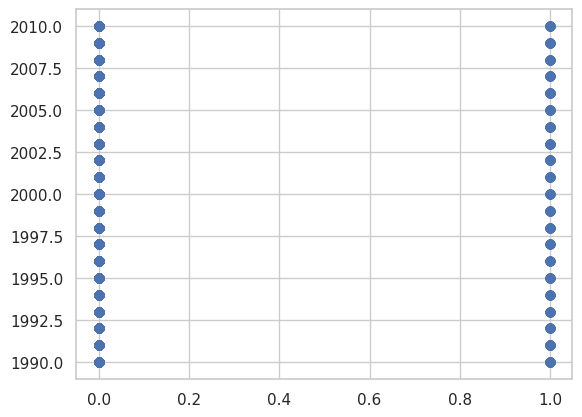

In [315]:
plt.scatter(db_songs[main_variables[1]], db_songs[choosen_variables[2]])
print(f'Correlación con {choosen_variables[2]}: {db_songs[main_variables[1]].corr(db_songs[choosen_variables[2]])}')

Correlación con timesignature: 0.04236761291166795


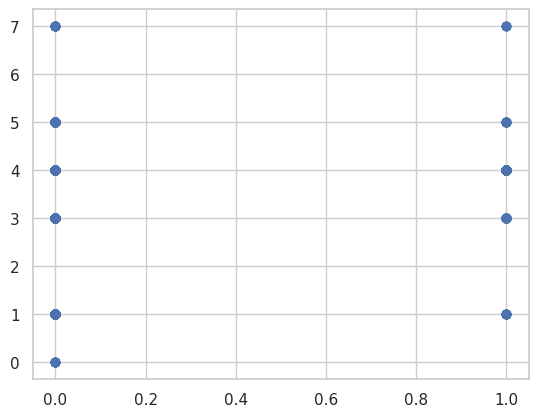

In [316]:
plt.scatter(db_songs[main_variables[1]], db_songs[choosen_variables[3]])
print(f'Correlación con {choosen_variables[3]}: {db_songs[main_variables[1]].corr(db_songs[choosen_variables[3]])}')

In [252]:
correlation_matrix = db_songs.corr()
correlation_matrix

<ipython-input-252-6d9b0b9b800b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = db_songs.corr()


,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,top10
year,1.000000,-0.007117,0.018721,0.242695,0.012650,-0.045854,-0.034196,0.002148,0.055855,-0.076973,-0.095928
timesignature,-0.007117,1.000000,0.333240,0.106863,0.051895,0.161295,0.018242,-0.015695,0.091151,-0.093421,0.042368
timesignature_confidence,0.018721,0.333240,1.000000,0.160689,-0.031631,0.323993,0.010653,-0.016586,0.103828,-0.095404,0.060802
loudness,0.242695,0.106863,0.160689,1.000000,0.052429,0.139639,-0.007503,0.018724,0.741992,0.060418,-0.087649
tempo,0.012650,0.051895,-0.031631,0.052429,1.000000,-0.022986,0.013344,0.071195,0.155758,0.040799,-0.002545
tempo_confidence,-0.045854,0.161295,0.323993,0.139639,-0.022986,1.000000,0.016605,-0.012830,0.148477,-0.054756,0.084852
key,-0.034196,0.018242,0.010653,-0.007503,0.013344,0.016605,1.000000,-0.043337,0.009073,0.010347,0.029125
key_confidence,0.002148,-0.015695,-0.016586,0.018724,0.071195,-0.012830,-0.043337,1.000000,-0.052697,-0.082441,0.010182
energy,0.055855,0.091151,0.103828,0.741992,0.155758,0.148477,0.009073,-0.052697,1.000000,0.313516,-0.116992
pitch,-0.076973,-0.093421,-0.095404,0.060418,0.040799,-0.054756,0.010347,-0.082441,0.313516,1.000000,-0.137622


In [253]:
correlation_with_top10 = correlation_matrix['energy']
correlation_with_top10

year                        0.055855
timesignature               0.091151
timesignature_confidence    0.103828
loudness                    0.741992
tempo                       0.155758
tempo_confidence            0.148477
key                         0.009073
key_confidence             -0.052697
energy                      1.000000
pitch                       0.313516
top10                      -0.116992
Name: energy, dtype: float64

In [254]:
sorted_correlation_with_top10 = correlation_with_top10.abs().sort_values(ascending=False)
sorted_correlation_with_top10

energy                      1.000000
loudness                    0.741992
pitch                       0.313516
tempo                       0.155758
tempo_confidence            0.148477
top10                       0.116992
timesignature_confidence    0.103828
timesignature               0.091151
year                        0.055855
key_confidence              0.052697
key                         0.009073
Name: energy, dtype: float64

<ipython-input-255-01569dc8c4e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(db_songs.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);


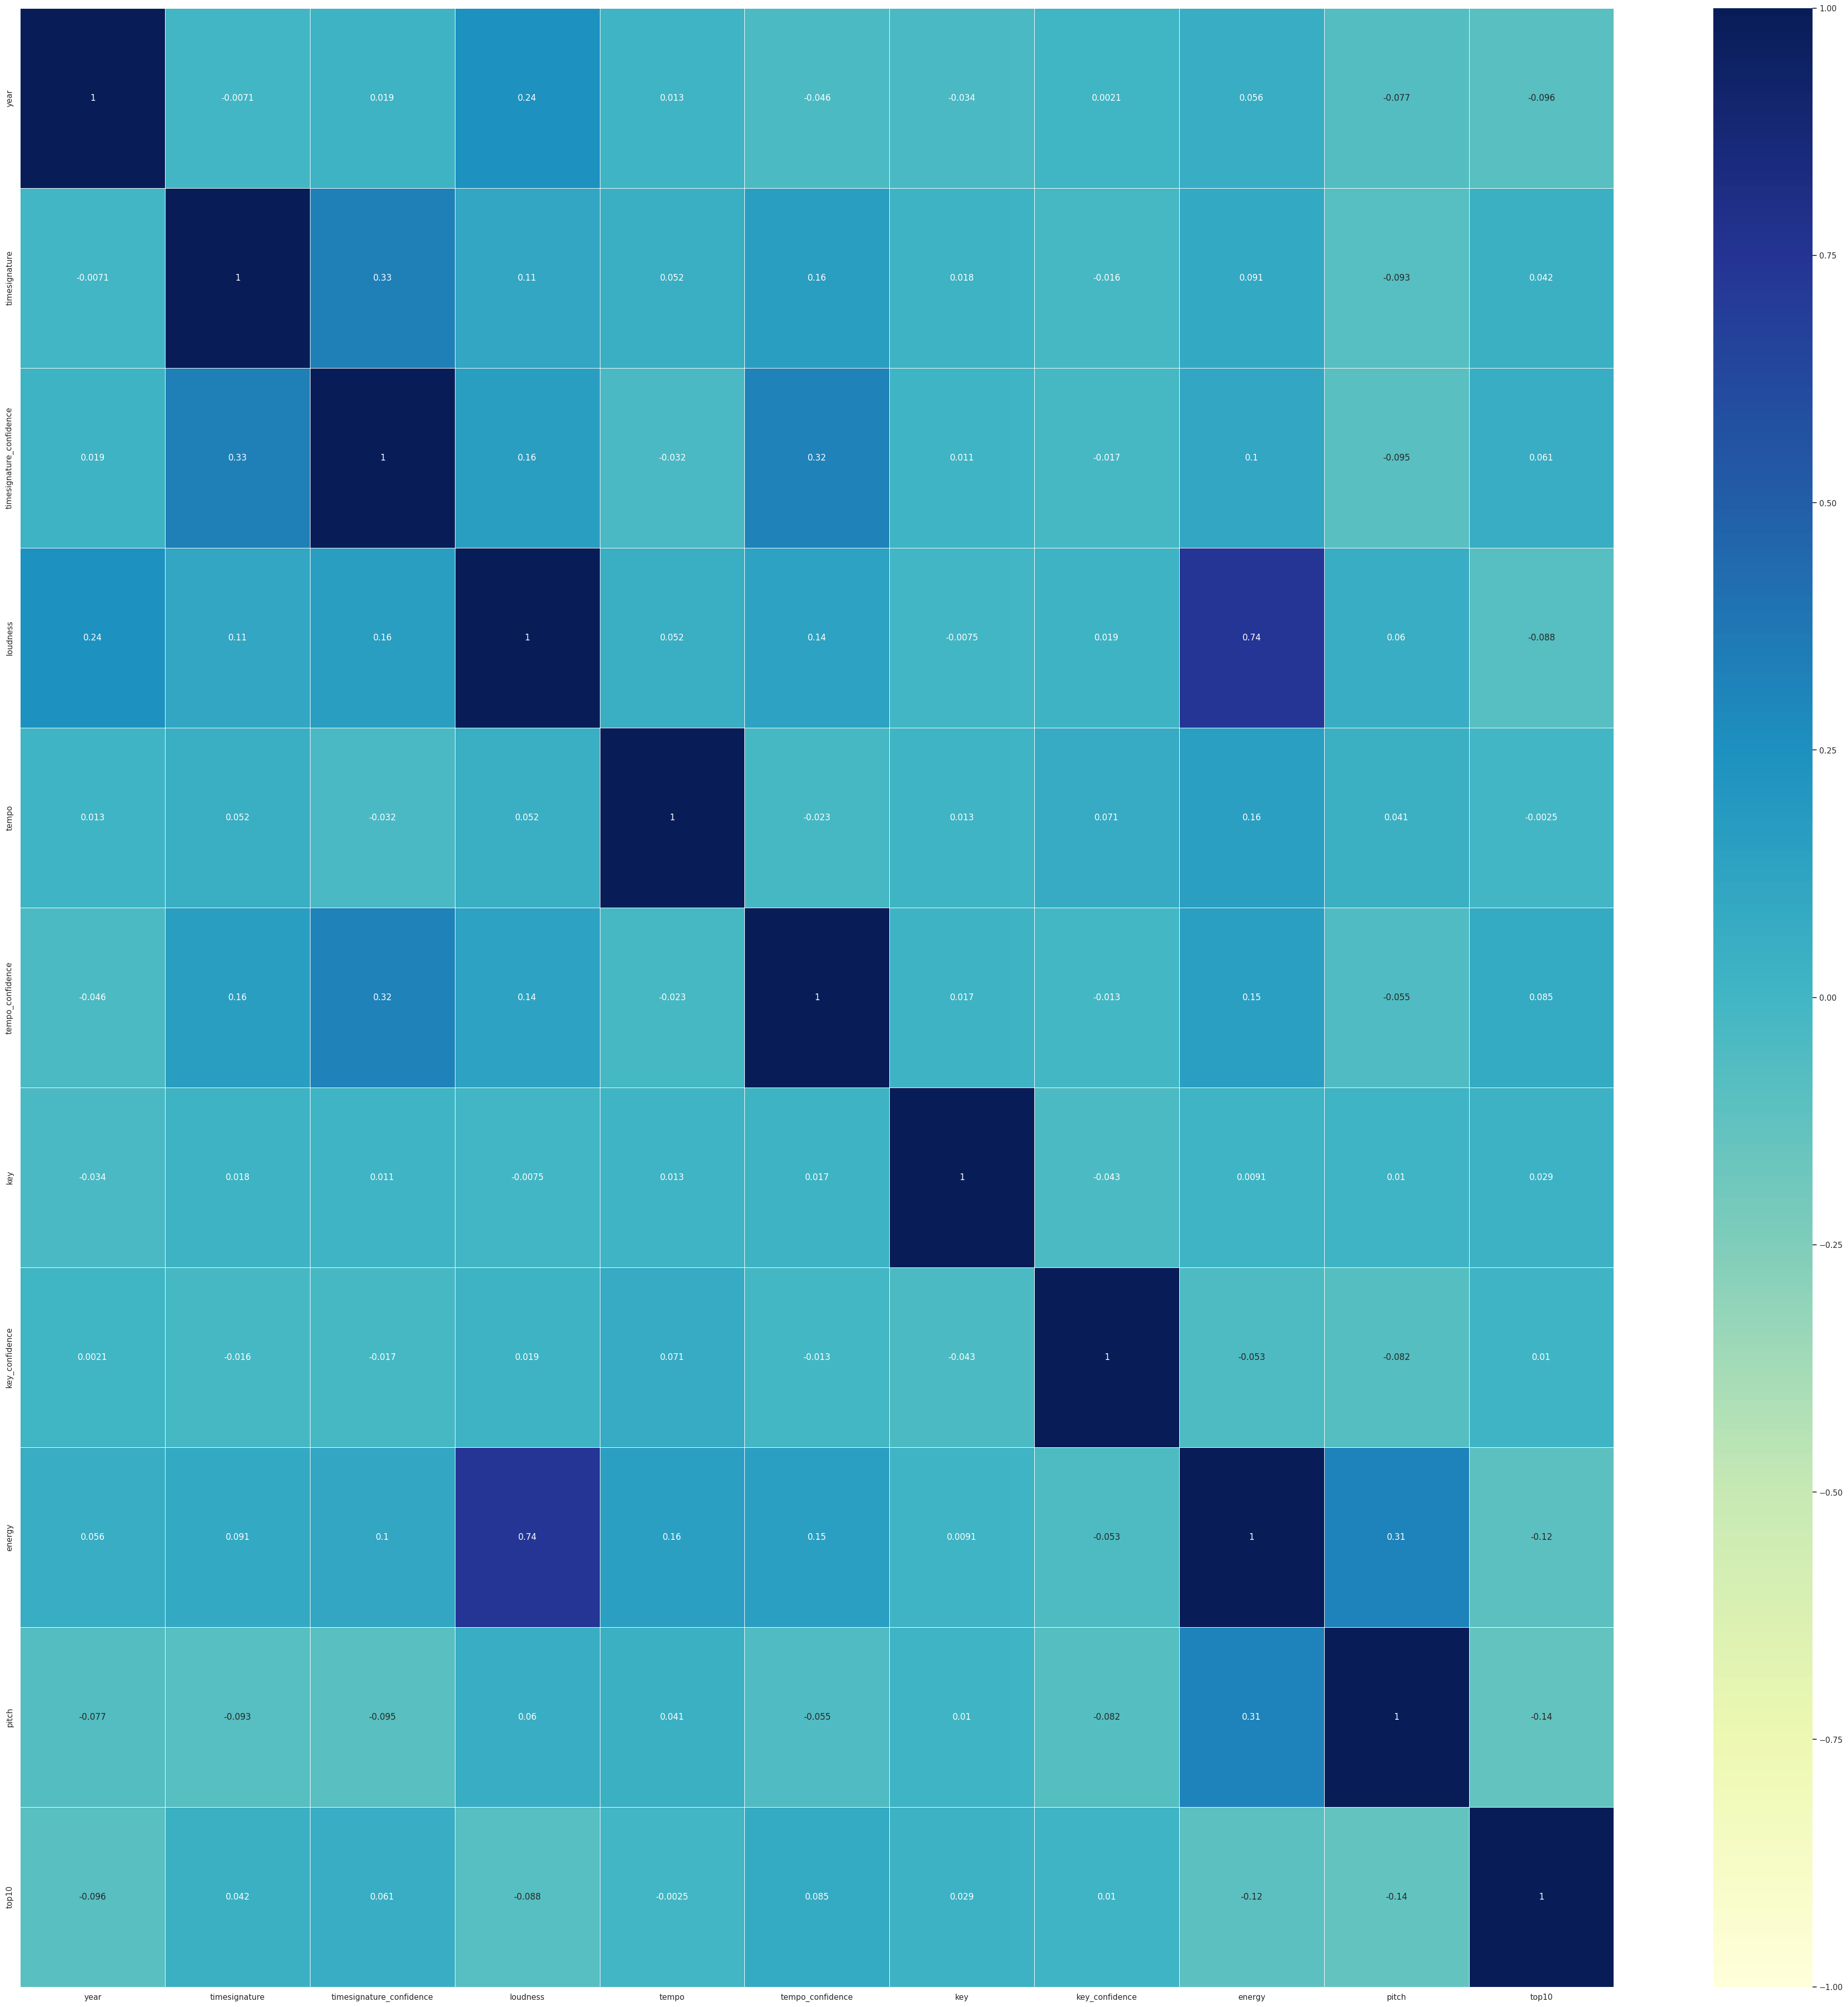

In [255]:
plt.figure(figsize=(50, 50))
ax = sns.heatmap(db_songs.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

<ipython-input-256-6192e129ad6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = db_songs.corr()


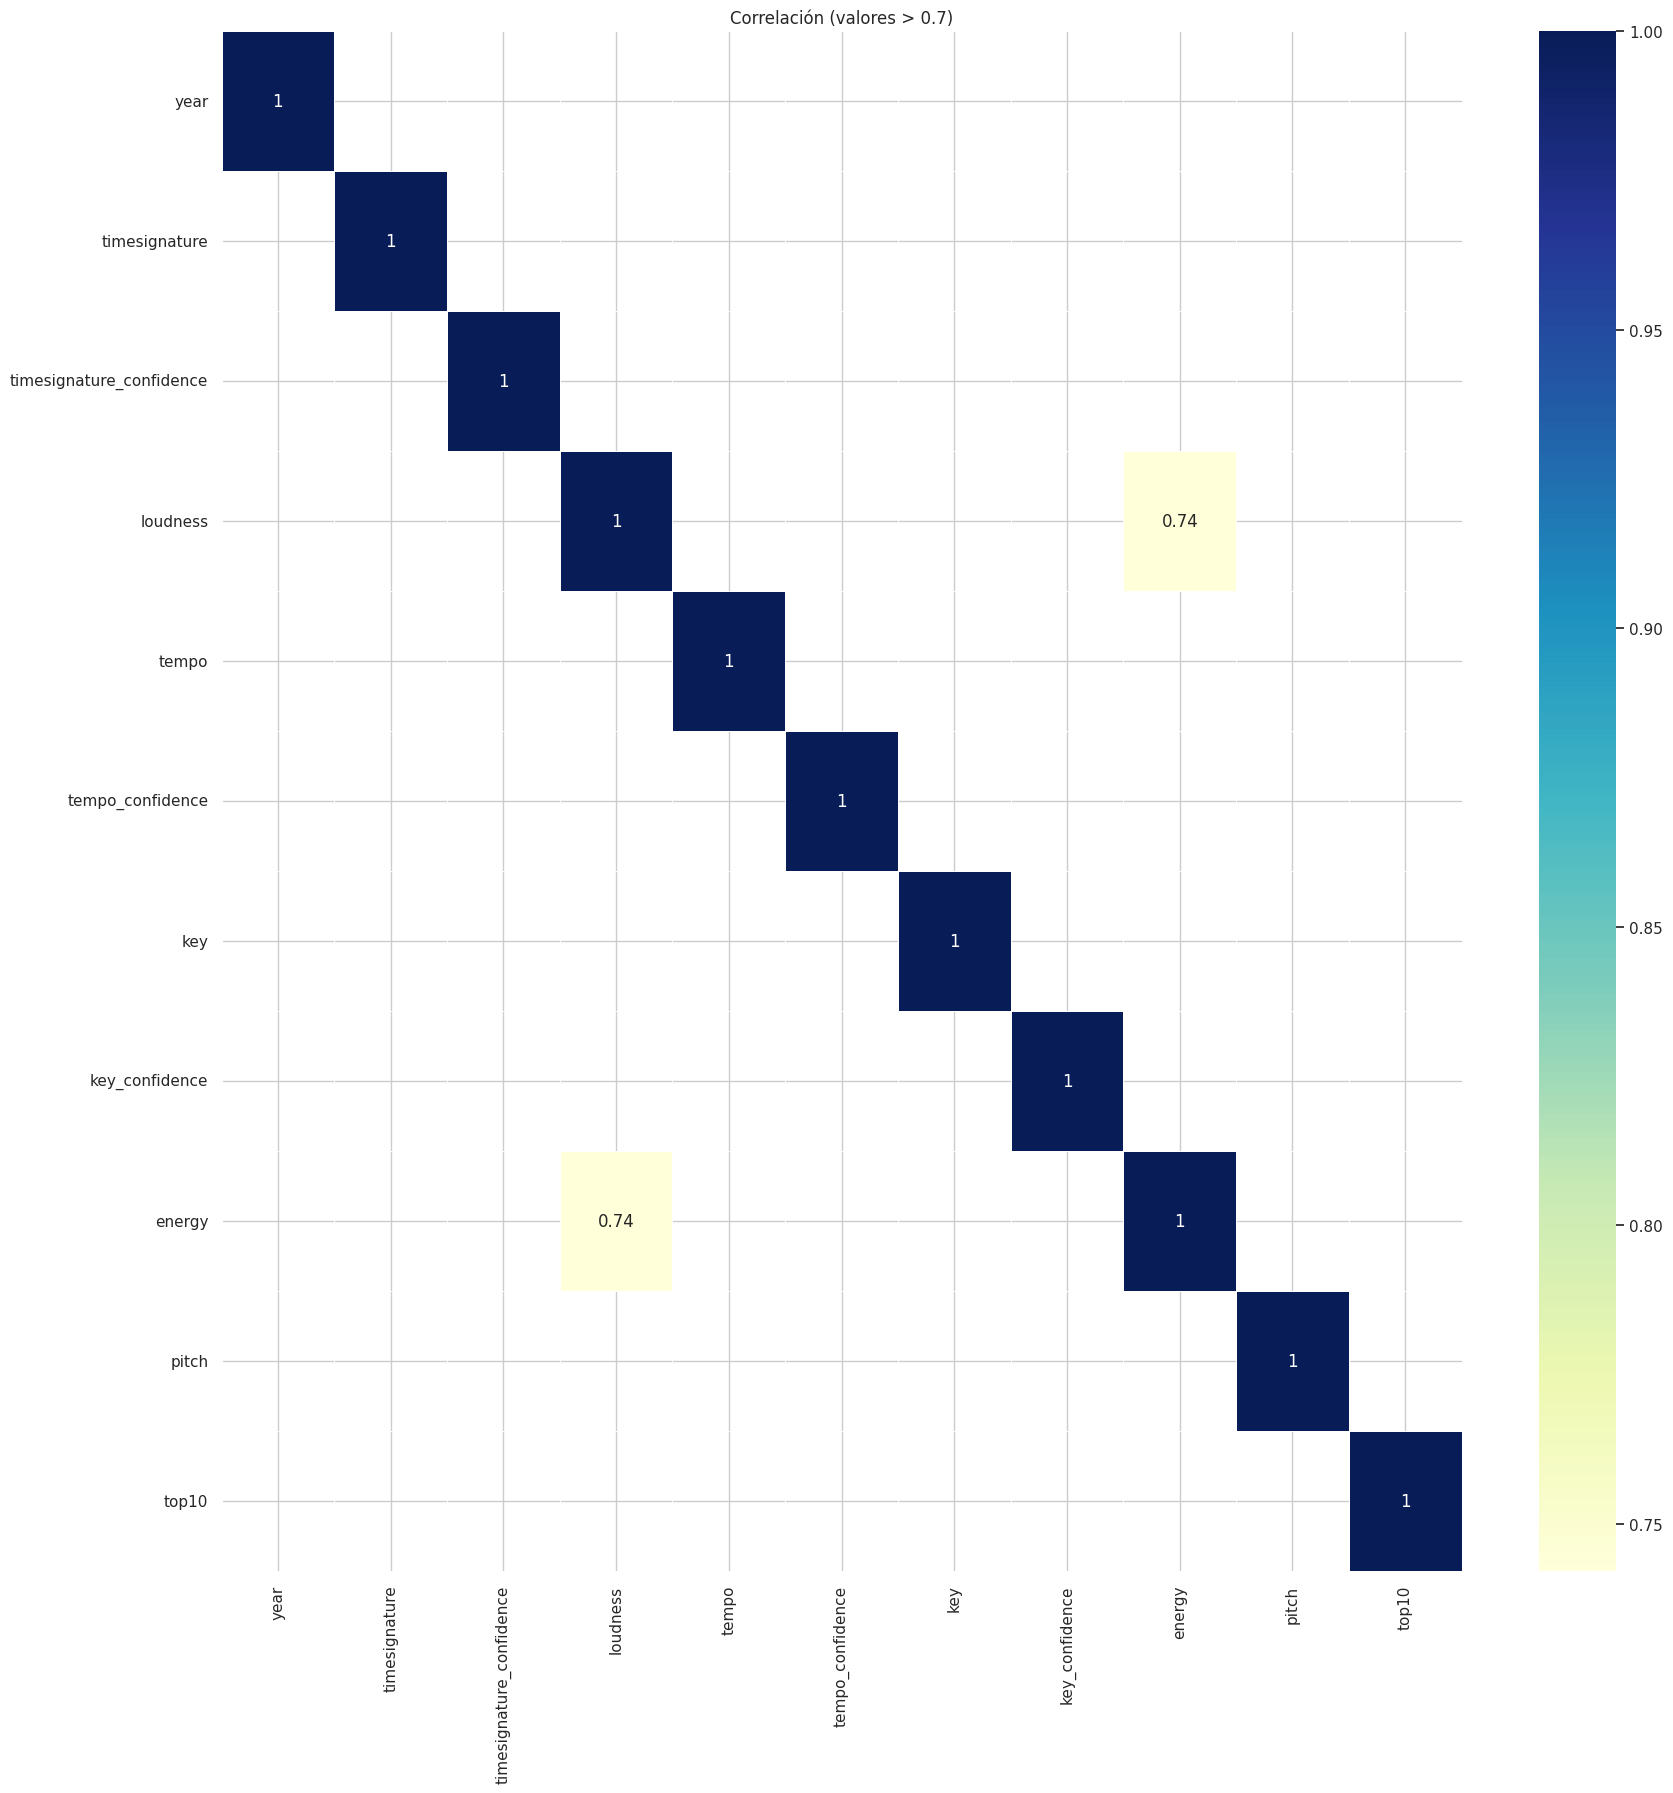

In [256]:
corr_matrix = db_songs.corr()
high_corr = corr_matrix[corr_matrix > 0.7]
plt.figure(figsize=(20, 20))
sns.heatmap(high_corr, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Correlación (valores > 0.7)')
plt.show()

<ipython-input-257-a387fff236d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = db_songs.corr()


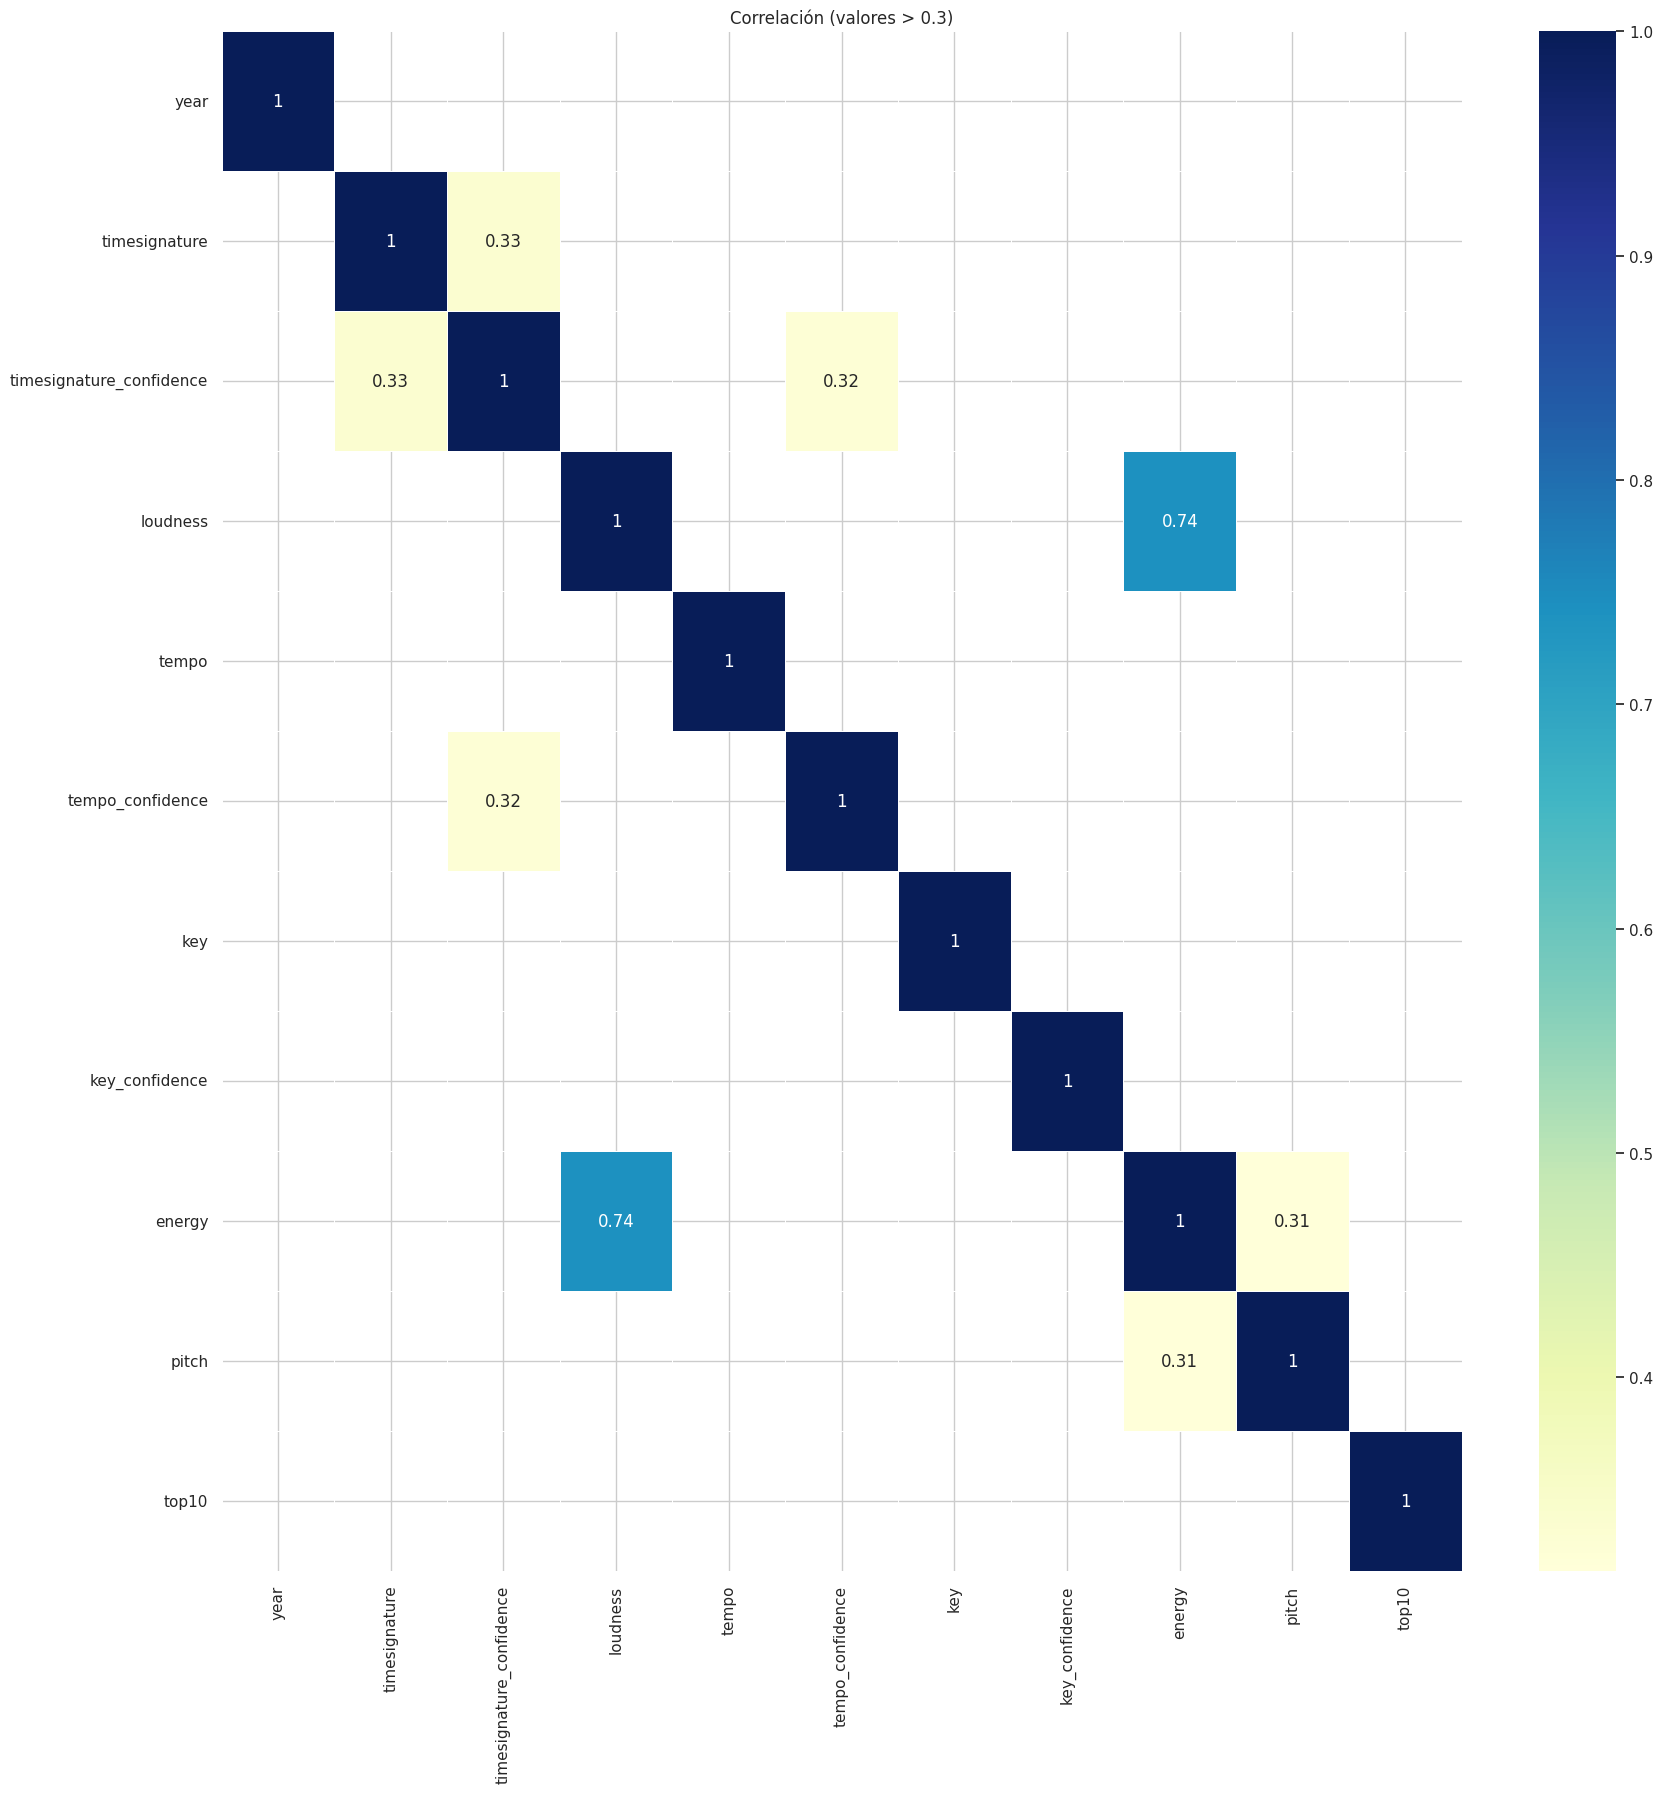

In [257]:
corr_matrix = db_songs.corr()
moderate_corr = corr_matrix[corr_matrix > 0.3]
plt.figure(figsize=(20, 20))
sns.heatmap(moderate_corr, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Correlación (valores > 0.3)')
plt.show()

**Correlaciones con timesignature**

In [258]:
correlation_energy = db_songs[['top10', 'timesignature']].corr()
correlation_energy['timesignature']

top10            0.042368
timesignature    1.000000
Name: timesignature, dtype: float64




#### Machine Learning: Clasificación No Supervisada y Supervisada

K-Means:

In [260]:
from sklearn.cluster import KMeans

In [261]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [262]:
k_means.fit(db_songs[['energy', 'top10']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=6)

In [263]:
centers = k_means.cluster_centers_

centers

array([[9.14030302e-01, 2.02615702e-15],
       [7.77930424e-01, 1.00000000e+00],
       [2.16253180e-01, 8.60422844e-16],
       [7.01832295e-01, 1.77635684e-15],
       [4.15119409e-01, 1.00000000e+00],
       [4.78176282e-01, 1.55431223e-15]])

<ipython-input-264-f5e9f95d0a9d>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=db_songs, x='energy', y='top10', ax=ax, palette='rainbow')


<Axes: title={'center': 'Relación entre Energy y Top10'}, xlabel='energy', ylabel='top10'>

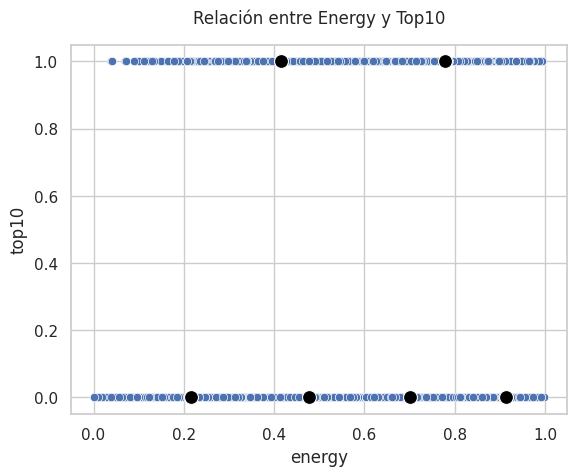

In [264]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Relación entre Energy y Top10', pad=15)
ax.set_xlabel('energy')
ax.set_ylabel('top10')

sns.scatterplot(data=db_songs, x='energy', y='top10', ax=ax, palette='rainbow')
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black')

In [265]:
colours = k_means.predict(db_songs[['energy', 'top10']])

<Axes: title={'center': 'Relación entre Energy y Top 10'}, xlabel='energy', ylabel='top10'>

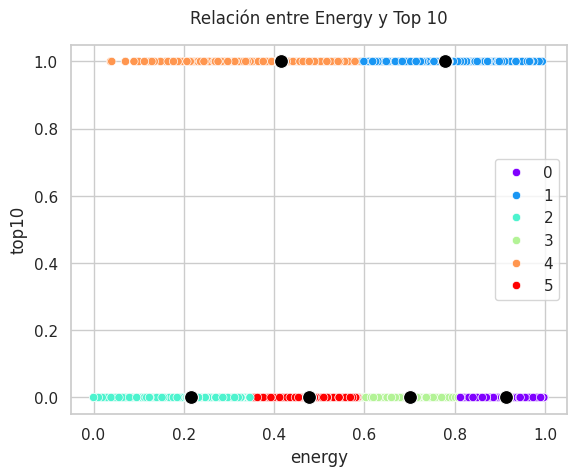

In [266]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Relación entre Energy y Top 10', pad=15)
ax.set_xlabel('energy')
ax.set_ylabel('top10')

sns.scatterplot(data=db_songs, x='energy', y='top10', hue = colours, ax=ax, palette='rainbow')
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black')

In [267]:
x = db_songs[['energy', 'timesignature']].to_numpy()
y = db_songs['year'].map({
    '2010':0,
    '1990':1
}).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [268]:
modelo_kmeans = KMeans(n_clusters = 2).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[0.54583825 2.53164557]
 [0.68897994 4.02578935]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [321]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [322]:
inercia = k_means.inertia_

In [323]:
silhouette = silhouette_score(x, k_means.labels_)

In [324]:
calinski_harabasz = calinski_harabasz_score(x, k_means.labels_)

In [325]:
print("Inercia:", inercia)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)


Inercia: 41.74548043819297
Silhouette Score: 0.0494469615131614
Calinski-Harabasz Score: 312.2423684675882


En resumen, los resultados indican que la agrupación realizada por los KMeans tiene una inercia relativamente baja, lo que sugiere una buena separación entre los clústeres. Sin embargo, el Silhouette Score es bajo, lo que sugiere cierta superposición entre los clústeres. El Calinski-Harabasz Score es moderadamente alto, lo que indica que los clústeres están densos y bien separados entre sí, pero puede haber cierta superposición.

Regresión Lineal

In [271]:
from sklearn.metrics import mean_squared_error

In [272]:
X = db_songs[['energy', 'timesignature']]
Y = db_songs['top10']

In [273]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4544, 2)
(3030, 2)
(4544,)
(3030,)


In [274]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [275]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.12120999492309471
Pruebas: MSE =0.12781299351749023


Un MSE bajo indica un mejor ajuste del modelo a los datos. Dado que los valores de MSE son bastante cercanos tanto en el conjunto de entrenamiento como en el conjunto de pruebas, esto sugiere que el modelo tiene un rendimiento consistente en ambos conjuntos de datos y no muestra signos de sobreajuste.



In [276]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,0.0,-0.064839
1,0.0,0.104666
2,0.0,0.193613
3,0.0,0.151195
4,1.0,0.112982
5,0.0,0.099957
6,0.0,0.133853
7,0.0,0.227457
8,0.0,0.169793
9,0.0,0.104260


 El modelo de regresión lineal parece ser bastante razonablemente bueno, ya que tiene un MSE bajo tanto en el conjunto de entrenamiento como en el conjunto de pruebas, lo que sugiere un buen ajuste y generalización a los datos.

In [327]:
modelo = LinearRegression()
scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mse_mean = mse_scores.mean()
print("MSE Scores:", mse_scores)
print("Mean MSE:", mse_mean)

MSE Scores: [0.11279115 0.10680657 0.11101328 0.11692381 0.17608052]
Mean MSE: 0.12472306686274064


 Los resultados indican que el modelo de regresión lineal tiene un MSE promedio de aproximadamente 0.1247 en todas las particiones de la validación cruzada. Esto sugiere que el modelo tiene un buen rendimiento en la predicción de los datos y que generaliza bien a conjuntos de datos no vistos.

Regresión Logística: Dado a que el dataset no contiene muchas variables categóricas, se trabajará con la columna top 10 y el 0 y 1 se tomarán como variables categóricas.

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [278]:
db_songs.fillna(db_songs.mean(), inplace=True)

<ipython-input-278-fb301c9adde4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  db_songs.fillna(db_songs.mean(), inplace=True)


In [279]:
X = db_songs[['energy', 'year', 'timesignature', ]]
y = db_songs['top10']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [281]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [282]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 84.75%


Si bien la Regresión Logística por lo general debe de contar con un score mayor a 95%, para fines prácticos el 84.75% cuenta con un puntaje decente para las limitaciones de no contar con otras variables categóricas.




*Matriz* de Confusión

In [283]:
from sklearn import metrics

In [284]:
from sklearn.metrics import classification_report

In [285]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[1284,    0],
       [ 231,    0]])

In [286]:
print("Matriz de Confusión:")
print(cnf_matrix)

Matriz de Confusión:
[[1284    0]
 [ 231    0]]


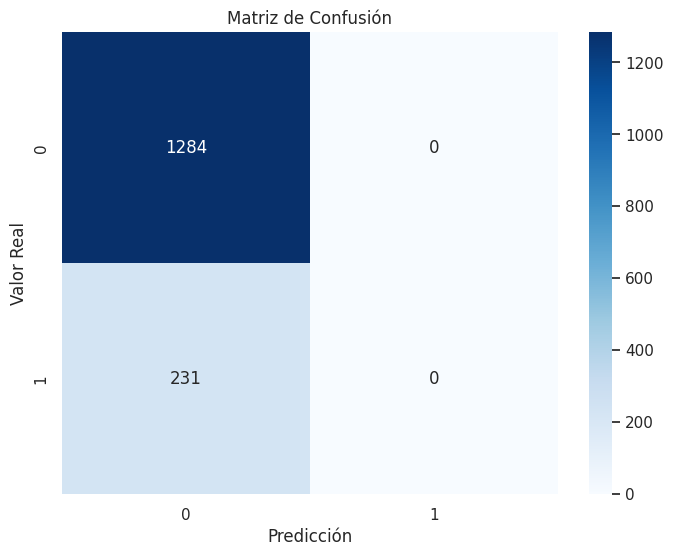

In [287]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

En la matriz de confusión, de acuerdo a como se ve en la tabla se trabajó con 2 grupos, tomando en cuenta que con la variable top 10, solo se determinaba el éxito si alcanzaba el top 10.

In [289]:
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [290]:
print(report)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1284
         1.0       0.00      0.00      0.00       231

    accuracy                           0.85      1515
   macro avg       0.42      0.50      0.46      1515
weighted avg       0.72      0.85      0.78      1515



En resumen, estos resultados sugieren que el modelo tiene un rendimiento razonablemente bueno para predecir la clase 0.0, pero un rendimiento muy pobre para predecir la clase 1.0. Es necesario investigar más para mejorar el rendimiento del modelo, especialmente para la clasificación de la clase minoritaria.

Curva ROC

In [291]:
y_proba = model.predict_proba(X_test)

In [292]:
y_test_binarized = label_binarize(y_test, classes=range(7))


In [293]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [294]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

In [295]:
mean_tpr /= 2
mean_auc = auc(all_fpr, mean_tpr)

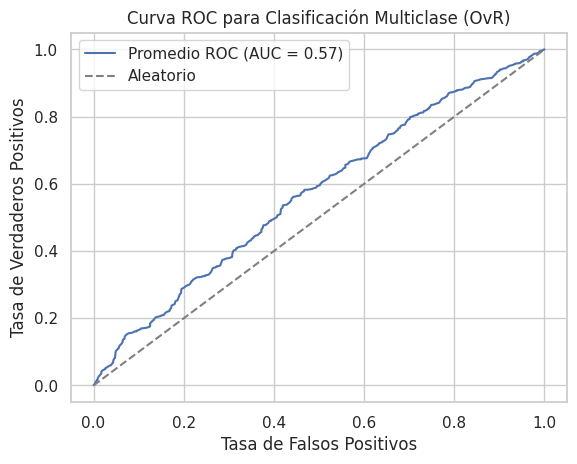

In [296]:
plt.figure()
plt.plot(all_fpr, mean_tpr, label='Promedio ROC (AUC = %0.2f)' % mean_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Clasificación Multiclase (OvR)')
plt.legend()
plt.show()

 Estos resultados sugieren que el modelo tiene un



rendimiento razonablemente bueno para predecir la clase 0.0, pero un rendimiento muy pobre para predecir la clase 1.0.

###Árbol de Decisión

In [301]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


In [298]:
X = db_songs[['energy', 'timesignature']]
Y = db_songs['top10']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=5)

In [300]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, Y_train)
Y_pred = tree_classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      2566
         1.0       0.19      0.18      0.18       464

    accuracy                           0.75      3030
   macro avg       0.52      0.52      0.52      3030
weighted avg       0.75      0.75      0.75      3030



Estos resultados sugieren que el modelo de árbol de decisión tiene un rendimiento moderado para predecir la clase mayoritaria (0.0), pero un rendimiento deficiente para predecir la clase minoritaria (1.0).

###Red Neuronal

In [305]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [306]:
X = db_songs[['energy', 'timesignature']].values
Y = db_songs['top10'].values

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=5)


In [308]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [309]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [310]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
114/114 [==============================] - 3s 14ms/step - loss: 0.4814 - accuracy: 0.7945 - val_loss: 0.4094 - val_accuracy: 0.8581
Epoch 2/10
114/114 [==============================] - 1s 10ms/step - loss: 0.4148 - accuracy: 0.8553 - val_loss: 0.4028 - val_accuracy: 0.8581
Epoch 3/10
114/114 [==============================] - 1s 11ms/step - loss: 0.4092 - accuracy: 0.8553 - val_loss: 0.3998 - val_accuracy: 0.8581
Epoch 4/10
114/114 [==============================] - 1s 13ms/step - loss: 0.4061 - accuracy: 0.8553 - val_loss: 0.4019 - val_accuracy: 0.8581
Epoch 5/10
114/114 [==============================] - 1s 10ms/step - loss: 0.4048 - accuracy: 0.8553 - val_loss: 0.4005 - val_accuracy: 0.8581
Epoch 6/10
114/114 [==============================] - 1s 8ms/step - loss: 0.4065 - accuracy: 0.8553 - val_loss: 0.3992 - val_accuracy: 0.8581
Epoch 7/10
114/114 [==============================] - 1s 6ms/step - loss: 0.4048 - accuracy: 0.8553 - val_loss: 0.4004 - val_accuracy: 0.8581
E

In [311]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

95/95 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8469
Loss: 0.41722142696380615
Accuracy: 0.8468647003173828


Al interpretar los resultados de la red neuronal, buscamos una combinación de baja pérdida y alta precisión en el conjunto de prueba, lo que indica un buen rendimiento del modelo en la tarea de clasificación de las canciones en el top 10.